In [1]:
import os
import sys
sys.path.append("/home/sardarchitect/repos/github.com/ucsd_capstone/")

In [2]:
from streetstudy.data import virat

In [72]:
CURRENT_VIDEO_PATH = '/home/sardarchitect/repos/github.com/ucsd_capstone/virat/videos/VIRAT_S_040103_05_000729_000804.mp4'
annotations_df = virat.get_annotations_df(CURRENT_VIDEO_PATH, format='yolo', normalize=False, object_id=True)

In [73]:
annotations_df.head()

,current_frame,object_type,object_id,bbox_center_x,bbox_center_y,bbox_width,bbox_height
2144,0,0,2,1280.0,190.0,48,88
2145,1,0,2,1277.0,188.0,48,88
2146,2,0,2,1277.0,188.0,48,88
2147,3,0,2,1274.0,188.0,48,88
2148,4,0,2,1274.0,188.0,48,88


In [74]:
import cv2 as cv

In [75]:
def generate_frames(video_path):
    capture = cv.VideoCapture(CURRENT_VIDEO_PATH)
    capture_width = capture.get(cv.CAP_PROP_FRAME_WIDTH)
    capture_height = capture.get(cv.CAP_PROP_FRAME_HEIGHT)
    
    while capture.isOpened():
        success, current_frame = capture.read()
        if not success:
            break
        
        yield current_frame
    capture.release()

In [76]:
frame_iterator = iter(generate_frames(CURRENT_VIDEO_PATH))
for i in range(5):
    current_frame = next(frame_iterator)

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

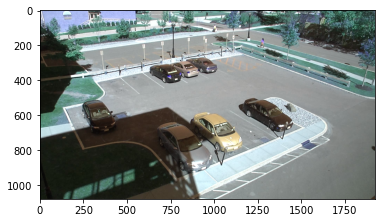

In [78]:
plt.imshow(current_frame)

## Pedestrian Density

In [79]:
import seaborn as sns

In [80]:
feet_x = annotations_df['bbox_center_x']
feet_y = annotations_df['bbox_center_y'] + (annotations_df['bbox_height'] / 2)

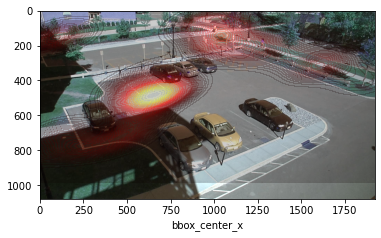

<Figure size 1296x576 with 0 Axes>

In [81]:
def pedestrian_density(frame, feet_x, feet_y):
    fig, ax = plt.subplots()
    sns.kdeplot(x=feet_x, y=feet_y, thresh=0, levels=50, alpha=0.2, fill=True, ax=ax, cmap='hot')
    fig.gca().invert_yaxis()
    ax.imshow(frame)
    
    
pedestrian_density(current_frame, feet_x, feet_y)
plt.figure(figsize=(18,8))
plt.show()
# How about you take an average of frames and underlay? 
# Frame by frame building the hotspots? While the person is viewing
# It would be nice to see the progression...maybe take 60 frames throughout the vid and display as GIF
# What do most people do at the hot spot?
# Train a model to classify activity (maybe use labels like "loading to car" as "standing")

## Person Specific Path

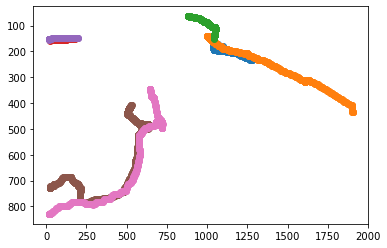

In [82]:
def person_path(object_id, annotations_df):
    obj_df = annotations_df[annotations_df['object_id'] == obj]
    feet_x = obj_df['bbox_center_x']
    feet_y = obj_df['bbox_center_y'] + (obj_df['bbox_height'] / 2)
    
#     fig, ax = plt.subplots()
    plt.scatter(feet_x, feet_y)
    plt.gca().invert_yaxis()
                            
object_id_list = annotations_df['object_id'].unique()
for obj in object_id_list:
    person_path(obj, annotations_df)
    
# Color based on activity 
# Add some filtering options so user can decide what they want to see


## Directional Analysis

In [65]:
import numpy as np

In [68]:
obj_df = annotations_df[annotations_df['object_id'] == object_id_list[0]]
x = obj_df['bbox_center_x']
y = obj_df['bbox_center_y'] + (obj_df['bbox_height'] / 2)

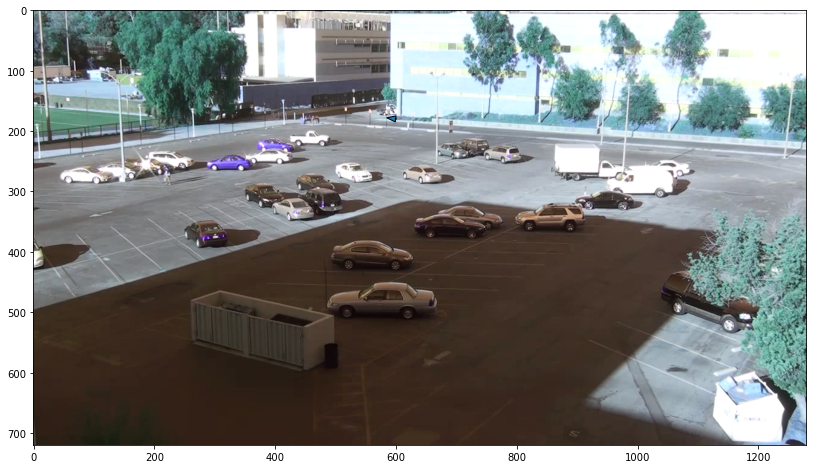

In [69]:
fig = plt.figure(figsize=(16,8))
step = 25
i = 0
while True:
    if i+step >= len(x):
        break
    X = x.iloc[i]
    Y = y.iloc[i]
    X_next = x.iloc[i + step]
    Y_next = y.iloc[i + step]
    dX = X_next - X
    dY = Y_next - Y
    
    plt.arrow(X, Y, dX, dY, length_includes_head=True, head_starts_at_zero=True, head_width=10)
    plt.gca().invert_yaxis()
    i = i + step
plt.imshow(current_frame)


In [70]:
step = 50
i = 0
while True:
    if i+step >= len(x):
        break
    X = x.iloc[i]
    Y = y.iloc[i]
    U = x.iloc[i + step]
    V = y.iloc[i + step]
    
    plt.quiver(X, Y, U, V, angles='uv', pivot='tail', units='width')
    plt.scatter(X, Y)
    plt.gca().invert_yaxis()
    i += step

In [71]:
def person_path(object_id, annotations_df):
    obj_df = annotations_df[annotations_df['object_id'] == obj]
    x = obj_df['bbox_center_x']
    y = obj_df['bbox_center_y'] + (obj_df['bbox_height'] / 2)
    

                            
object_id_list = annotations_df['object_id'].unique()
person_path(object_id_list[2], annotations_df)

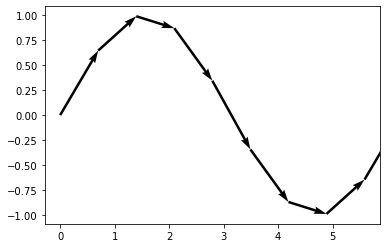

In [53]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)

plt.figure()
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)

plt.show()

## Dwell Times

## Number of Distinct People

## Flow Analysis (Walking, Running, Dwelling)